In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# using the make_blobs dataset
from sklearn.datasets.samples_generator import make_blobs
# for ignoring warning 
import warnings
warnings.filterwarnings('ignore')

In [11]:
#creating dataset
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
# setting the number of training examples
m=X.shape[0]
n=X.shape[1] 
n_iter=50

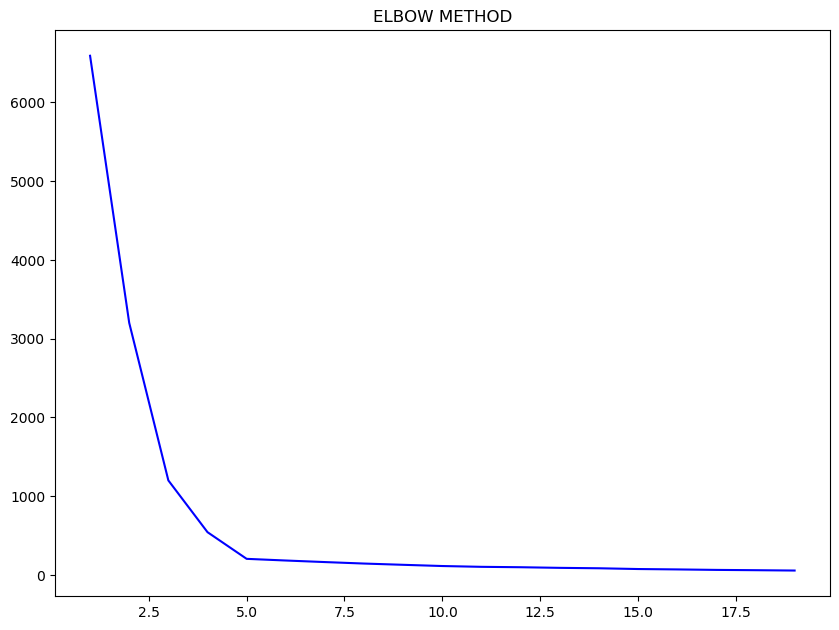

In [12]:
#using elbow method to determine optimal value of k. 
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

In [4]:
# computing the initial centroids
K=5
import random

# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 

# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

In [5]:
output={}

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance between for each centroid
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

In [6]:
# computing the mean of separated clusters
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

In [7]:
# repeating the above steps again and again
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

Text(0.5, 1.0, 'Original Dataset')

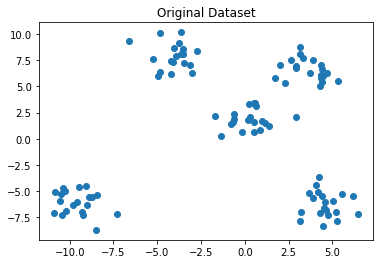

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

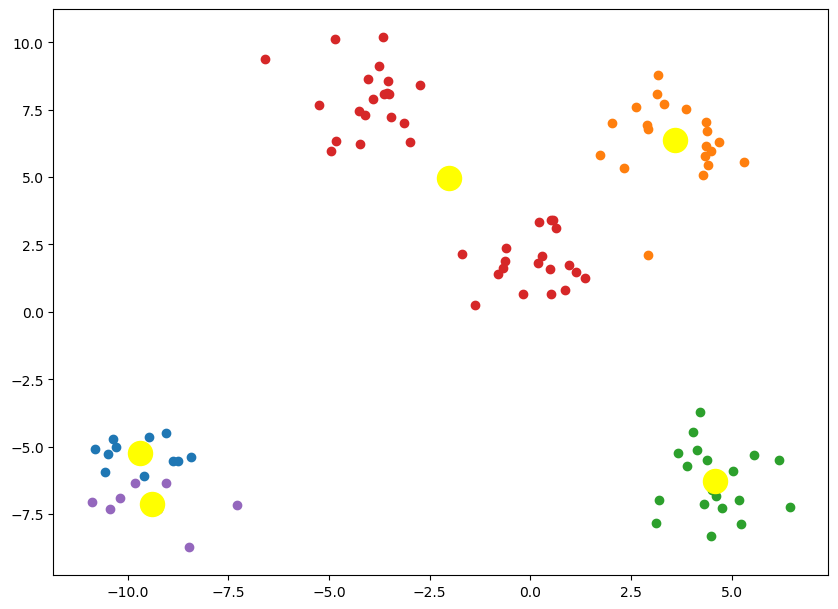

In [9]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()